## 1. Подключение библиотек

In [165]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


In [166]:
pip install --upgrade nltk


Note: you may need to restart the kernel to use updated packages.


In [167]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ruslanhudakov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [168]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ruslanhudakov/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [285]:
import pandas as pd
import string
import re
import nltk
import pymorphy3
import nltk
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer


In [287]:
file1 = pd.read_csv('PDF_pars.csv')
file2 = pd.read_csv('habr.csv')
file3 = pd.read_csv('parsing_data_json.csv')
dataframes = [file1, file2, file3]

In [289]:
dataframes = [df for df in dataframes if not df.empty]
combined = pd.concat(dataframes, ignore_index=True)
combined.to_csv('all_pars.csv', index=False)

In [291]:
df = pd.read_csv("all_pars.csv")

In [293]:
df.head(10)

,title,namecompany,description,rating,field,date,textpub,Unnamed: 0
0,Может ли chatGPT забронировать столик в рестор...,Андрей Тиунов @TAU15,Team Lead / Tech Lead,14.0,NaN,20.03.2023,КАК СТАТЬ АВТОРОМ Идея А почему бы не использ...,NaN
1,История российской науки_ напишем вместе_ _ ...,@Exosphere,"модератор «Хабра», куратор-эксперт",128.3,NaN,9 августа 2008,4.58 Оценка 353.18 Хабр Экосистема для развит...,NaN
2,"Cocoapods, Carthage, SPM как выбрать менеджер ...",@redmadrobot,Пользователь,13.0,NaN,20.03.2023,117.94 red_mad_robot №1 в разработке цифровых...,NaN
3,Генеральный директор Mozilla покинула свой п...,@AnnieBronson,Информационная служба Хабра,145.1,"IT-компании, Управление персоналом, Карьера в ...",08.02.2024,"Митчелл Бейкер, гендиректор Mozilla с 2020 год...",NaN
4,Как системному аналитику написать хорошее резю...,@Systems_Education,Пользователь,0.0,"Анализ и проектирование систем, Карьера в IT-и...",22.03.2023,"look, use the source! 1. Указывайте количестве...",NaN
5,"Инструменты наблюдаемости, о которых нужно зна...",@ru_vds,Пользователь,576.0,NaN,20.03.2023,2376.9 RUVDS.com VDS/VPS-хостинг. Скидка 15% ...,NaN
6,Быстрое начало работы с Gitlab CICD,Лиза Зубарькова @zubarek,Пользователь,16.9,NaN,20.03.2023,4.29 Оценка 280.79 Southbridge Обеспечиваем с...,NaN
7,«Рутек» представила планшет «Р‑Таб» _ Хабр,Алексей @Lexx_Nimofff,Пользователь,216.9,"Гаджеты, Смартфоны, Планшеты, Операционные сис...",29.04.2025,Компания «Рутек» представила планшет «Р‑Таб». ...,NaN
8,AI-агенты в реальном мире_ почему они не работ...,Курогло Александр @Kual,"Развиваю продукты SaaS, MarTech, FinTech + AI",31.6,NaN,29.04.2025,"Меня зовут Александр, я COO в SaaS-платформе а...",NaN
9,imgonline-com-ua-site2pdfB28eKGLy6EjA,Cloud4Y @Cloud4Y,Корпоративный облачный провайдер,53.5,NaN,20.03.2023,71.07 Cloud4Y #1 Автор оригинала: Yashwant S...,NaN


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        119 non-null    object 
 1   namecompany  119 non-null    object 
 2   description  119 non-null    object 
 3   rating       119 non-null    float64
 4   field        108 non-null    object 
 5   date         119 non-null    object 
 6   textpub      119 non-null    object 
 7   Unnamed: 0   102 non-null    float64
dtypes: float64(2), object(6)
memory usage: 7.6+ KB


## 2. Предварительная обработка данных

1. Перевод всех букв в тексте в нижний регистр
2. Удаление знаков препинания
3. Токенизация по словам
4. Удаление стоп слов
5. Стемминг (приведение слов к нормальной форме)
6. Лемматизация

In [299]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '❯\xa0—«»'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [301]:
df['prep_text'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(text.lower())))) for text in df['textpub']]

In [302]:
df.head()

,title,namecompany,description,rating,field,date,textpub,Unnamed: 0,prep_text
0,Может ли chatGPT забронировать столик в рестор...,Андрей Тиунов @TAU15,Team Lead / Tech Lead,14.0,NaN,20.03.2023,КАК СТАТЬ АВТОРОМ Идея А почему бы не использ...,NaN,как стать автором идея а почему бы не использо...
1,История российской науки_ напишем вместе_ _ ...,@Exosphere,"модератор «Хабра», куратор-эксперт",128.3,NaN,9 августа 2008,4.58 Оценка 353.18 Хабр Экосистема для развит...,NaN,оценка хабр экосистема для развития людей вов...
2,"Cocoapods, Carthage, SPM как выбрать менеджер ...",@redmadrobot,Пользователь,13.0,NaN,20.03.2023,117.94 red_mad_robot №1 в разработке цифровых...,NaN,red mad robot № в разработке цифровых решений...
3,Генеральный директор Mozilla покинула свой п...,@AnnieBronson,Информационная служба Хабра,145.1,"IT-компании, Управление персоналом, Карьера в ...",08.02.2024,"Митчелл Бейкер, гендиректор Mozilla с 2020 год...",NaN,митчелл бейкер гендиректор mozilla с года объя...
4,Как системному аналитику написать хорошее резю...,@Systems_Education,Пользователь,0.0,"Анализ и проектирование систем, Карьера в IT-и...",22.03.2023,"look, use the source! 1. Указывайте количестве...",NaN,look use the source указывайте количественно и...


In [305]:
df = df.drop(columns=['Unnamed: 0'])

In [307]:
df.head()

,title,namecompany,description,rating,field,date,textpub,prep_text
0,Может ли chatGPT забронировать столик в рестор...,Андрей Тиунов @TAU15,Team Lead / Tech Lead,14.0,NaN,20.03.2023,КАК СТАТЬ АВТОРОМ Идея А почему бы не использ...,как стать автором идея а почему бы не использо...
1,История российской науки_ напишем вместе_ _ ...,@Exosphere,"модератор «Хабра», куратор-эксперт",128.3,NaN,9 августа 2008,4.58 Оценка 353.18 Хабр Экосистема для развит...,оценка хабр экосистема для развития людей вов...
2,"Cocoapods, Carthage, SPM как выбрать менеджер ...",@redmadrobot,Пользователь,13.0,NaN,20.03.2023,117.94 red_mad_robot №1 в разработке цифровых...,red mad robot № в разработке цифровых решений...
3,Генеральный директор Mozilla покинула свой п...,@AnnieBronson,Информационная служба Хабра,145.1,"IT-компании, Управление персоналом, Карьера в ...",08.02.2024,"Митчелл Бейкер, гендиректор Mozilla с 2020 год...",митчелл бейкер гендиректор mozilla с года объя...
4,Как системному аналитику написать хорошее резю...,@Systems_Education,Пользователь,0.0,"Анализ и проектирование систем, Карьера в IT-и...",22.03.2023,"look, use the source! 1. Указывайте количестве...",look use the source указывайте количественно и...


In [309]:
df['textpub'][0]

'КАК СТАТЬ АВТОРОМ  Идея А почему бы не использовать возможности chatGPT и попросить его делать что-то за нас? Например, давайте попробуем настроить его так, чтобы он мог забронировать нам столик в наш любимый ресторан. Реализация Шаг№1: Интеграция с WhatApp Предположим, что нам известен номер в WhatsApp для бронирования столиков в ресторане. Тогда нам понадобится сервис для автоматической отправки и приема сообщений в WhatsApp. Таких сервисов много, для пример возьмем сервис https://wazzup24.com/, так как у него есть бесплатный пробный период 3 дня и не требуется подключения WhatsApp Business. Регистрируемся на их сайте и получаем API ключ:  6 часов назад 8 мин TAU15 ? 2K Мессенджеры* ,  Python* ,  Искусственный интеллект  Получение API ключа в сервисе Wazzup24 Шаг№2: Запускаем сервер API на Flask Принимать сообщения мы будем через установку webhook. Вот ссылка на документацию: https://wazzup24.ru/help/webhooks-2/ Отправлять сообщения будем вот такой функцией:  def wazzup24_sendMessag

In [311]:
df['prep_text'][0]

'как стать автором идея а почему бы не использовать возможности chatgpt и попросить его делать что то за нас например давайте попробуем настроить его так чтобы он мог забронировать нам столик в наш любимый ресторан реализация шаг№ интеграция с whatapp предположим что нам известен номер в whatsapp для бронирования столиков в ресторане тогда нам понадобится сервис для автоматической отправки и приема сообщений в whatsapp таких сервисов много для пример возьмем сервис https wazzup com так как у него есть бесплатный пробный период дня и не требуется подключения whatsapp business регистрируемся на их сайте и получаем api ключ часов назад мин tau k мессенджеры python искусственный интеллект получение api ключа в сервисе wazzup шаг№ запускаем сервер api на flask принимать сообщения мы будем через установку webhook вот ссылка на документацию https wazzup ru help webhooks отправлять сообщения будем вот такой функцией def wazzup sendmessage message data token print start send message headers acc

In [313]:
russian_stopwords = stopwords.words("russian") 

In [315]:
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [317]:
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который','с','своём','всем','наш', 'свой']) 

### Токенезация

In [320]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [322]:
df['tokenize_text'] = [tokenize(text) for text in df['prep_text']]

In [323]:
df['tokenize_text'][0]

'стать автором идея почему использовать возможности chatgpt попросить делать например давайте попробуем настроить мог забронировать нам столик любимый ресторан реализация шаг№ интеграция whatapp предположим нам известен номер whatsapp бронирования столиков ресторане нам понадобится сервис автоматической отправки приема сообщений whatsapp таких сервисов пример возьмем сервис https wazzup com бесплатный пробный период дня требуется подключения whatsapp business регистрируемся сайте получаем api ключ часов назад мин tau k мессенджеры python искусственный интеллект получение api ключа сервисе wazzup шаг№ запускаем сервер api flask принимать сообщения будем установку webhook ссылка документацию https wazzup ru help webhooks отправлять сообщения будем функцией def wazzup sendmessage message data token print start send message headers accept application json authorization bearer token content type application json check webhooks res requests request get https api wazzup com print res res text

In [326]:
df.head()

,title,namecompany,description,rating,field,date,textpub,prep_text,tokenize_text
0,Может ли chatGPT забронировать столик в рестор...,Андрей Тиунов @TAU15,Team Lead / Tech Lead,14.0,NaN,20.03.2023,КАК СТАТЬ АВТОРОМ Идея А почему бы не использ...,как стать автором идея а почему бы не использо...,стать автором идея почему использовать возможн...
1,История российской науки_ напишем вместе_ _ ...,@Exosphere,"модератор «Хабра», куратор-эксперт",128.3,NaN,9 августа 2008,4.58 Оценка 353.18 Хабр Экосистема для развит...,оценка хабр экосистема для развития людей вов...,оценка хабр экосистема развития людей вовлечен...
2,"Cocoapods, Carthage, SPM как выбрать менеджер ...",@redmadrobot,Пользователь,13.0,NaN,20.03.2023,117.94 red_mad_robot №1 в разработке цифровых...,red mad robot № в разработке цифровых решений...,red mad robot № разработке цифровых решений би...
3,Генеральный директор Mozilla покинула свой п...,@AnnieBronson,Информационная служба Хабра,145.1,"IT-компании, Управление персоналом, Карьера в ...",08.02.2024,"Митчелл Бейкер, гендиректор Mozilla с 2020 год...",митчелл бейкер гендиректор mozilla с года объя...,митчелл бейкер гендиректор mozilla года объяви...
4,Как системному аналитику написать хорошее резю...,@Systems_Education,Пользователь,0.0,"Анализ и проектирование систем, Карьера в IT-и...",22.03.2023,"look, use the source! 1. Указывайте количестве...",look use the source указывайте количественно и...,look use the source указывайте количественно к...


### Стемминг снижает слова к их основе для уменьшения разнообразия форм.

In [329]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
    except Exception as e:
        print(e)
        
df['text_stem'] = stem_list

In [330]:
df.head()

,title,namecompany,description,rating,field,date,textpub,prep_text,tokenize_text,text_stem
0,Может ли chatGPT забронировать столик в рестор...,Андрей Тиунов @TAU15,Team Lead / Tech Lead,14.0,NaN,20.03.2023,КАК СТАТЬ АВТОРОМ Идея А почему бы не использ...,как стать автором идея а почему бы не использо...,стать автором идея почему использовать возможн...,стат автор иде поч использова возможн chatgpt ...
1,История российской науки_ напишем вместе_ _ ...,@Exosphere,"модератор «Хабра», куратор-эксперт",128.3,NaN,9 августа 2008,4.58 Оценка 353.18 Хабр Экосистема для развит...,оценка хабр экосистема для развития людей вов...,оценка хабр экосистема развития людей вовлечен...,оценк хабр экосистем развит люд вовлечен it фе...
2,"Cocoapods, Carthage, SPM как выбрать менеджер ...",@redmadrobot,Пользователь,13.0,NaN,20.03.2023,117.94 red_mad_robot №1 в разработке цифровых...,red mad robot № в разработке цифровых решений...,red mad robot № разработке цифровых решений би...,red mad robot № разработк цифров решен бизнес ...
3,Генеральный директор Mozilla покинула свой п...,@AnnieBronson,Информационная служба Хабра,145.1,"IT-компании, Управление персоналом, Карьера в ...",08.02.2024,"Митчелл Бейкер, гендиректор Mozilla с 2020 год...",митчелл бейкер гендиректор mozilla с года объя...,митчелл бейкер гендиректор mozilla года объяви...,митчелл бейкер гендиректор mozilla год объяв п...
4,Как системному аналитику написать хорошее резю...,@Systems_Education,Пользователь,0.0,"Анализ и проектирование систем, Карьера в IT-и...",22.03.2023,"look, use the source! 1. Указывайте количестве...",look use the source указывайте количественно и...,look use the source указывайте количественно к...,look use the source указыва количествен качест...


In [331]:
df['text_stem'][0]

'стат автор иде поч использова возможн chatgpt попрос дела например дава попробу настро мог забронирова нам столик любим рестора реализац шаг№ интеграц whatapp предполож нам извест номер whatsapp бронирован столик ресторан нам понадоб сервис автоматическ отправк прием сообщен whatsapp так сервис пример возьм сервис https wazzup com бесплатн пробн период дня треб подключен whatsapp business регистриру сайт получа api ключ час назад мин tau k мессенджер python искусствен интеллект получен api ключ сервис wazzup шаг№ запуска сервер api flask принима сообщен буд установк webhook ссылк документац https wazzup ru help webhooks отправля сообщен буд функц def wazzup sendmessage message data token print start send message headers accept application json authorization bearer token content type application json check webhooks res requests request get https api wazzup com print res res text webhooks json loads res text if webhooks webhooksuri is none webhooks data webhooksuri https ap subscription

In [332]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

#### Лемматизация приводит слова к их базовым формам, часто более точная, чем стемминг.

In [338]:
%%time
lemm_texts_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['text_lemm'] = lemm_texts_list

CPU times: user 5.68 s, sys: 16.3 ms, total: 5.7 s
Wall time: 5.72 s


In [339]:
df.head()

,title,namecompany,description,rating,field,date,textpub,prep_text,tokenize_text,text_stem,text_lemm
0,Может ли chatGPT забронировать столик в рестор...,Андрей Тиунов @TAU15,Team Lead / Tech Lead,14.0,NaN,20.03.2023,КАК СТАТЬ АВТОРОМ Идея А почему бы не использ...,как стать автором идея а почему бы не использо...,стать автором идея почему использовать возможн...,стат автор иде поч использова возможн chatgpt ...,стать автор идея почему использовать возможнос...
1,История российской науки_ напишем вместе_ _ ...,@Exosphere,"модератор «Хабра», куратор-эксперт",128.3,NaN,9 августа 2008,4.58 Оценка 353.18 Хабр Экосистема для развит...,оценка хабр экосистема для развития людей вов...,оценка хабр экосистема развития людей вовлечен...,оценк хабр экосистем развит люд вовлечен it фе...,оценка хабра экосистема развитие человек вовле...
2,"Cocoapods, Carthage, SPM как выбрать менеджер ...",@redmadrobot,Пользователь,13.0,NaN,20.03.2023,117.94 red_mad_robot №1 в разработке цифровых...,red mad robot № в разработке цифровых решений...,red mad robot № разработке цифровых решений би...,red mad robot № разработк цифров решен бизнес ...,red mad robot № разработка цифровой решение би...
3,Генеральный директор Mozilla покинула свой п...,@AnnieBronson,Информационная служба Хабра,145.1,"IT-компании, Управление персоналом, Карьера в ...",08.02.2024,"Митчелл Бейкер, гендиректор Mozilla с 2020 год...",митчелл бейкер гендиректор mozilla с года объя...,митчелл бейкер гендиректор mozilla года объяви...,митчелл бейкер гендиректор mozilla год объяв п...,митчелла бейкер гендиректор mozilla год объяви...
4,Как системному аналитику написать хорошее резю...,@Systems_Education,Пользователь,0.0,"Анализ и проектирование систем, Карьера в IT-и...",22.03.2023,"look, use the source! 1. Указывайте количестве...",look use the source указывайте количественно и...,look use the source указывайте количественно к...,look use the source указыва количествен качест...,look use the source указывать количественно ка...


In [340]:
df['text_lemm'][0]

'стать автор идея почему использовать возможность chatgpt попросить делать например давать попробовать настроить мочь забронировать мы столик любимый ресторан реализация шаг№ интеграция whatapp предположим мы известный номер whatsapp бронирование столик ресторан мы понадобиться сервис автоматический отправка приём сообщение whatsapp такой сервис пример взять сервис https wazzup com бесплатный пробный период день требоваться подключение whatsapp business регистрироваться сайт получать api ключ час назад мина tau k мессенджер python искусственный интеллект получение api ключ сервис wazzup шаг№ запускать сервер api flask принимать сообщение быть установка webhook ссылка документация https wazzup ru help webhooks отправлять сообщение быть функция def wazzup sendmessage message data token print start send message headers accept application json authorization bearer token content type application json check webhooks res requests request get https api wazzup com print res res text webhooks js

In [341]:
df['text_lemm'] = [tokenize(text) for text in df['text_lemm']]

In [342]:
df.head()

,title,namecompany,description,rating,field,date,textpub,prep_text,tokenize_text,text_stem,text_lemm
0,Может ли chatGPT забронировать столик в рестор...,Андрей Тиунов @TAU15,Team Lead / Tech Lead,14.0,NaN,20.03.2023,КАК СТАТЬ АВТОРОМ Идея А почему бы не использ...,как стать автором идея а почему бы не использо...,стать автором идея почему использовать возможн...,стат автор иде поч использова возможн chatgpt ...,стать автор идея почему использовать возможнос...
1,История российской науки_ напишем вместе_ _ ...,@Exosphere,"модератор «Хабра», куратор-эксперт",128.3,NaN,9 августа 2008,4.58 Оценка 353.18 Хабр Экосистема для развит...,оценка хабр экосистема для развития людей вов...,оценка хабр экосистема развития людей вовлечен...,оценк хабр экосистем развит люд вовлечен it фе...,оценка хабра экосистема развитие человек вовле...
2,"Cocoapods, Carthage, SPM как выбрать менеджер ...",@redmadrobot,Пользователь,13.0,NaN,20.03.2023,117.94 red_mad_robot №1 в разработке цифровых...,red mad robot № в разработке цифровых решений...,red mad robot № разработке цифровых решений би...,red mad robot № разработк цифров решен бизнес ...,red mad robot № разработка цифровой решение би...
3,Генеральный директор Mozilla покинула свой п...,@AnnieBronson,Информационная служба Хабра,145.1,"IT-компании, Управление персоналом, Карьера в ...",08.02.2024,"Митчелл Бейкер, гендиректор Mozilla с 2020 год...",митчелл бейкер гендиректор mozilla с года объя...,митчелл бейкер гендиректор mozilla года объяви...,митчелл бейкер гендиректор mozilla год объяв п...,митчелла бейкер гендиректор mozilla год объяви...
4,Как системному аналитику написать хорошее резю...,@Systems_Education,Пользователь,0.0,"Анализ и проектирование систем, Карьера в IT-и...",22.03.2023,"look, use the source! 1. Указывайте количестве...",look use the source указывайте количественно и...,look use the source указывайте количественно к...,look use the source указыва количествен качест...,look use the source указывать количественно ка...


# Облако слов

In [344]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [345]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [346]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

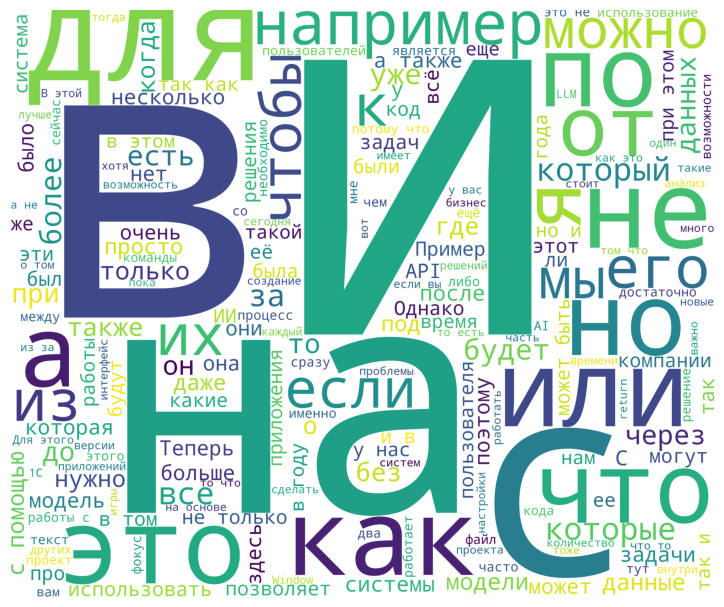

CPU times: user 7.24 s, sys: 853 ms, total: 8.1 s
Wall time: 6.62 s


In [352]:
%%time
corpus = get_corpus(df['textpub'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

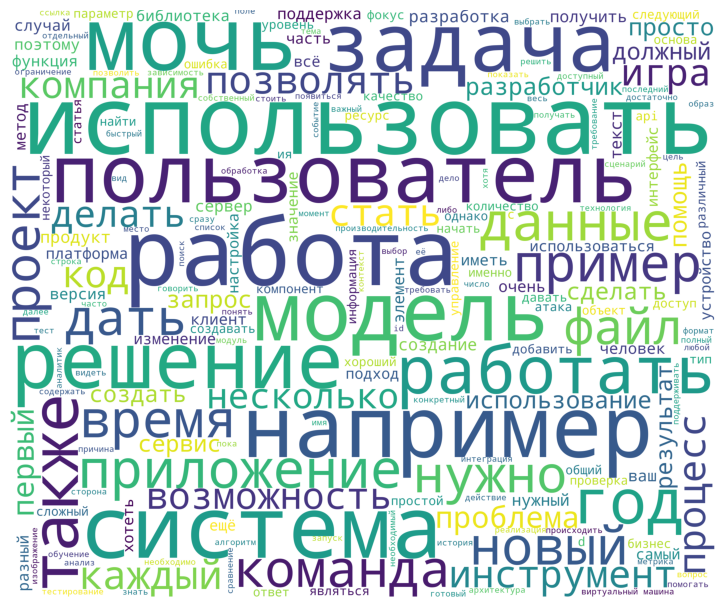

In [356]:
corpus = get_corpus(df['text_lemm'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
plt.show()

In [357]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

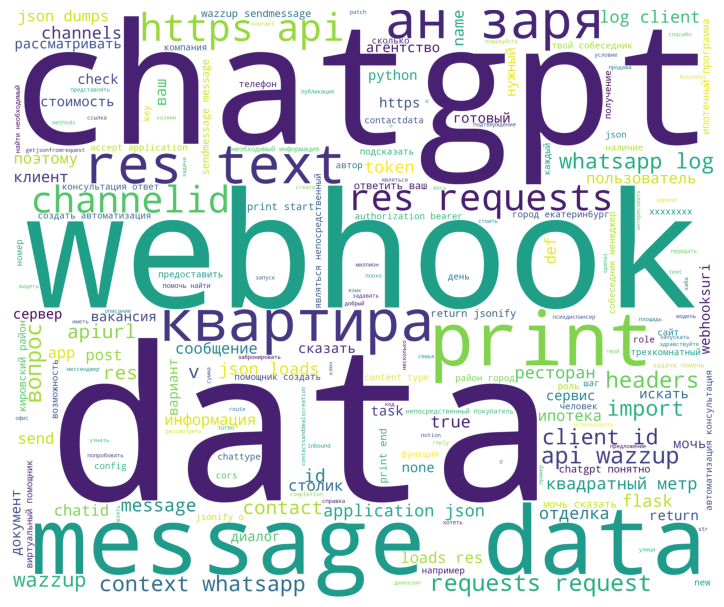

In [358]:
corpus = df['text_lemm'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
plt.show()

In [ ]:
corpus = df['text_lemm'][1]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
plt.show()

In [ ]:
df['text_lemm'][1]

In [ ]:
corpus = df['text_lemm'][2]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [ ]:
df['text_lemm'][2]

# Векторизация текстовых данных

Векторизация текста или преобразование текста в численную форму. Алгоритмы машинного обучения не умеют работать с текстом, поэтому необходимо превратить текст в цифры.

1. Прямое кодирование (one-hot encoding) 

Прямое кодирование (one-hot encoding) считается самым простым способом преобразования токенов в тензоры и выполняется следующим образом:

1. каждый токен представляет бинарный вектор (значения 0 или 1);
2. единица ставится тому элементу, который соответствует номеру токена в словаре.

Проблемой прямого кодирования является размерность. 

__Мешок слов__ - решает проблему размерности по одной оси. Количество строк определяется количеством документов. Однако, этот метод не учитывает важность того или иного токена, ведь одно слово может повторятся по несколько раз. В пакете scikit-learn есть модуль CountVectorizer, который преобразовывает входной текст в матрицу, значениями которой являются количества вхождения данного ключа(слова) в текст. Таким образом, мы получим матрицу, размерность которой будет равна количеству всех слов, умноженных на количество документов. И элементами матрицы будут числа, которые означают, сколько раз всего слово встретилось в тексте.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df['text_lemm'][0]

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(df['text_lemm'])

In [ ]:
print(vectorizer.vocabulary_)

In [ ]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['text_lemm'])

In [ ]:
count_matrix.shape

In [ ]:
vectorizer.get_feature_names_out()[400:1000]

In [ ]:
print(count_matrix)

__TF-IDF__ - это способ векторизации текста, отражающий важность слова в документе, а не только частоту его появления. В тексте большого объема некоторые слова могут присутствовать очень часто, но при этом не нести никакой значимой информации о фактическом содержании текста (документа). Если такие данные передавать непосредственно классификатору, то такие частые термины могут затенять частоты более редких, но при этом более интересных терминов. Для того, чтобы этого избежать, достаточно разделить количество употреблений каждого слова в документе на общее количество слов в документе, это есть TF — частота термина. Термин IDF (inverse document frequency) обозначает обратную частоту термина (инверсия частоты) с которой некоторое слово встречается в документах. IDF позволяет измерить непосредственную важность термина.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=14000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [ ]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_lemm'])

In [ ]:
tfidf_matrix.shape

In [ ]:
tfidf_vectorizer.get_feature_names_out()[:100]

In [ ]:
tfidf_vectorizer.get_feature_names_out()[1253]

In [ ]:
tfidf_vectorizer.get_feature_names_out()[5866]

In [ ]:
print(tfidf_matrix)